In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Market Regime

A ideia é construir um modelo (ou indicador) capaz de detectar mudanças no regime do mercado de renda variável 
quando este muda de um estado de **baixa** para **media ou alta** volatilidade.

Para fins de ilustração, a Figura a seguir mostra as séries históricas de preço e de variações percentuais 
diárias, de 2000 a 2020, do índice americano S&P500. 


In [2]:
v_directory = ''

In [5]:
v_sp500 = pd.read_csv(v_directory + 'S&P500.csv', parse_dates=True)
v_sp500['Date'] = pd.to_datetime(v_sp500['Date'], infer_datetime_format=True)
v_sp500.index = v_sp500['Date'].values
v_sp500.sort_index(inplace=True)
v_sp500.dropna(thresh=4, axis=0, inplace=True)
v_sp500.info()

v_sp500.head(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5084 entries, 2000-01-03 to 2020-03-18
Data columns (total 7 columns):
Date         5084 non-null datetime64[ns]
Open         5084 non-null float64
High         5084 non-null float64
Low          5084 non-null float64
Close        5084 non-null float64
Adj Close    5084 non-null float64
Volume       5084 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 317.8 KB


,Date,Open,High,Low,Close,Adj Close,Volume
2000-01-03,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
2000-01-10,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
2000-01-11,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
2000-01-12,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
2000-01-13,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000
2000-01-14,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1465.150024,1085900000


In [6]:
v_sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2020-03-12,2020-03-12,2630.860107,2660.949951,2478.860107,2480.639893,2480.639893,8829380000
2020-03-13,2020-03-13,2569.989990,2711.330078,2492.370117,2711.020020,2711.020020,8258670000
2020-03-16,2020-03-16,2508.590088,2562.979980,2380.939941,2386.129883,2386.129883,7781540000
2020-03-17,2020-03-17,2425.659912,2553.929932,2367.040039,2529.189941,2529.189941,8358500000
2020-03-18,2020-03-18,2436.500000,2453.570068,2280.520020,2398.100098,2398.100098,8755780000


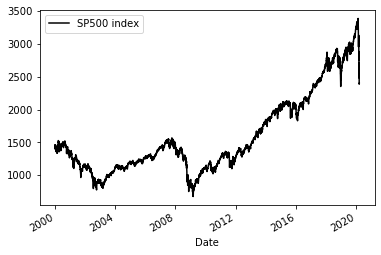

In [5]:
v_sp500['Close'].plot(style='k', label='SP500 index')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

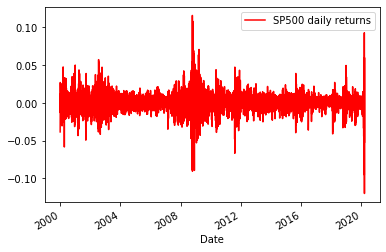

In [6]:
v_sp500['Close'].pct_change().plot(style='r', label='SP500 daily returns')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

In [8]:
#v_sp500['Close'].pct_change()

Observe que a série de retornos diários carrega algumas informações que não parecem tão evidentes 
na série de preços. Ao longo de todo o período vemos oscilações na faixa de 1.5% a 3.0% ao dia, 
tanto em níveis positivos quanto negativos, acompanhados de algumas casos mais extremos fora dessa faixa.
O estados de **média** e **alta volatilidade** estão associados a estas oscilações mais extremas que ocorrem 
**fora da faixa** de normalidade.

Durante os períodos de crise sistêmica, como em 2008 e também em 2020, percebe-se um aumento 
significativo na magnitude das oscilações diárias - com variações da ordem de 10% ao dia. Nesses períodos, 
grandes perdas inicias geralmente vêm acompanhadas de repiques e correções à estas perdas.  
 
Para cada uma dessas grandes oscilações podemos tentar construir uma explicação lógica ou apresentar um 
fato macroeconômico ou geopolítico, mas na verdade grande parte delas são meramente 
resultados da atuação excessiva dos agentes no mercado. O fato é que estados anormais de volatilidade 
refletem incerteza trazendo maior risco para a tomada de decisão do investidor.

O mercado de renda variável americano possui um indice que reflete a volatilidade esperada do índice S&P500: 
**CBOE - VIX**. Ver gráfico a seguir. 


In [12]:
v_vix = pd.read_csv(v_directory + '2019-04-19', parse_dates=True)
v_vix['Date'] = pd.to_datetime(v_vix['Date'], infer_datetime_format=True)
v_vix.index = v_sp500['Date'].values
v_vix.sort_index(inplace=True)
v_vix = v_vix.drop(columns=['Volume'])
v_vix.dropna(thresh=4, axis=0, inplace=True)
v_vix.info()

v_vix.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5084 entries, 2000-01-03 to 2020-03-18
Data columns (total 6 columns):
Date         5084 non-null datetime64[ns]
Open         5084 non-null float64
High         5084 non-null float64
Low          5084 non-null float64
Close        5084 non-null float64
Adj Close    5084 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 278.0 KB


,Date,Open,High,Low,Close,Adj Close
2000-01-03,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999
2000-01-04,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000
2000-01-05,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000
2000-01-06,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000
2000-01-07,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999
2000-01-10,2000-01-10,21.889999,22.490000,21.360001,21.709999,21.709999
2000-01-11,2000-01-11,21.980000,22.629999,21.690001,22.500000,22.500000
2000-01-12,2000-01-12,23.049999,23.490000,22.410000,22.840000,22.840000
2000-01-13,2000-01-13,22.730000,23.100000,21.320000,21.709999,21.709999
2000-01-14,2000-01-14,19.830000,20.150000,19.510000,19.660000,19.660000


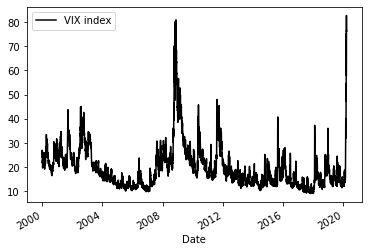

In [11]:
v_vix['Close'].plot(style='k', label='VIX index')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

In [10]:
v_vix['Close']

2000-01-03    24.209999
2000-01-04    27.010000
2000-01-05    26.410000
2000-01-06    25.730000
2000-01-07    21.719999
2000-01-10    21.709999
2000-01-11    22.500000
2000-01-12    22.840000
2000-01-13    21.709999
2000-01-14    19.660000
2000-01-18    21.500000
2000-01-19    21.719999
2000-01-20    21.750000
2000-01-21    20.820000
2000-01-24    24.070000
2000-01-25    23.020000
2000-01-26    23.030001
2000-01-27    23.540001
2000-01-28    26.139999
2000-01-31    24.950001
2000-02-01    23.450001
2000-02-02    23.120001
2000-02-03    22.010000
2000-02-04    21.540001
2000-02-07    22.790001
2000-02-08    21.250000
2000-02-09    22.900000
2000-02-10    23.070000
2000-02-11    24.420000
2000-02-14    24.379999
                ...    
2020-02-05    15.150000
2020-02-06    14.960000
2020-02-07    15.470000
2020-02-10    15.040000
2020-02-11    15.180000
2020-02-12    13.740000
2020-02-13    14.150000
2020-02-14    13.680000
2020-02-18    14.830000
2020-02-19    14.380000
2020-02-20    15

## Obtendo dados para Análise

#### Dados de International Exchanges: **SP500, DOW30, NYSE100, NASDAQ100, CBOE-VIX, etc.**  

<ul>
<li> estes dados são geralmente obtidos com periodicidade diária. Serão reamostrados para periodicidade semanal, usando a sexta-feira como data de referência da semana.
<li> para formação do candle semanal (open, high, low, close, volume), são tomados os seguintes valores na semana:
    <ol>
    <li>open: valor de abertura do primeiro dia útil da semana</li>
    <li>high: valor máximo da semana</li>
    <li>low: valor mínimo da semana</li>
    <li>close: valor de fechamento do último dia útil da semana</li>
    <li>volume: volume agregado da semana</li>
    </ol>
    
<li> Se o valor referente a sexta-feira for faltante, devido a um feriado (dia não útil) por exemplo, então a imputação ocorre substituindo o valor de sexta-feira pelo último dia útil daquela semana, ex. quinta-feira . O mesmo é feito para o primeiro dia útil da semana, caso este seja um dado faltante. <b>Forward Filling</b>
</ul>

#### Dados de Indicadores de Incerteza baseados em Análise de Sentimentos: **US-EPU Index, Twitter Index, etc.** 

<ul>
    <li> Estes dados geralmente são obtidos numa <b>granularidade diferente, geralmente mensal</b>. Assim, será necessário o uso de mecanismos de imputação (<b>Silvana</b>) para que eles também fiquem com periodicidade semanal. 
        
</ul>

### International Exchange Data

- Exemplo de Amostragem Semanal

### S&P500

In [19]:
v_sp500_week_start_date = v_sp500.resample('W-FRI').first()['Date']
v_sp500_week_end_date = v_sp500.resample('W-FRI').last()['Date']
v_sp500_num_of_weeks = min(len(v_sp500_week_start_date), len(v_sp500_week_end_date))

v_sp500_weekly_dict = {'date': [], 'open': [], 'high': [], 'low':[], 'close':[], 'volume':[], 'volatility':[]}

for i in range(v_sp500_num_of_weeks):
    v_sp500_week = v_sp500[v_sp500_week_start_date[i]:v_sp500_week_end_date[i]]
    if len(v_sp500_week) > 0:
        v_sp500_weekly_dict['date'].append(v_sp500_week_end_date.index[i])
        v_sp500_weekly_dict['open'].append(v_sp500_week['Open'][0])
        v_sp500_weekly_dict['close'].append(v_sp500_week['Close'][-1])
        v_sp500_weekly_dict['high'].append(v_sp500_week['High'].max())
        v_sp500_weekly_dict['low'].append(v_sp500_week['Low'].min())
        v_sp500_weekly_dict['volume'].append(v_sp500_week['Volume'].sum())
        if len(v_sp500_week) == 1:
            v_sp500_weekly_dict['volatility'].append(0.0)
        else:
            v_sp500_weekly_dict['volatility'].append(np.std(v_sp500_week['Close'].pct_change().dropna().values))    

v_sp500_weekly = pd.DataFrame.from_dict(v_sp500_weekly_dict)
v_sp500_weekly.index = pd.to_datetime(v_sp500_weekly['date'].values)
v_sp500_weekly.drop(['date'], axis=1, inplace=True)
#v_sp500_weekly = v_sp500_weekly[:-1]

v_sp500_weekly.info()


v_sp500_weekly.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1055 entries, 2000-01-07 to 2020-03-20
Data columns (total 6 columns):
open          1055 non-null float64
high          1055 non-null float64
low           1055 non-null float64
close         1055 non-null float64
volume        1055 non-null int64
volatility    1055 non-null float64
dtypes: float64(5), int64(1)
memory usage: 57.7 KB


,open,high,low,close,volume,volatility
2000-01-07,1469.250000,1478.000000,1377.680054,1441.469971,5343800000,0.023406
2000-01-14,1441.469971,1473.000000,1427.079956,1465.150024,5169700000,0.010543
2000-01-21,1465.150024,1465.709961,1438.540039,1441.359985,4455000000,0.003115
2000-01-28,1441.359985,1454.089966,1356.199951,1360.160034,5532100000,0.012306
2000-02-04,1360.160034,1435.910034,1350.140015,1424.369995,5205000000,0.005608


In [20]:
v_sp500_weekly.tail()

,open,high,low,close,volume,volatility
2020-02-21,3369.040039,3393.520020,3328.449951,3337.750000,15253460000,0.006230
2020-02-28,3257.610107,3259.810059,2855.840088,2954.219971,31535270000,0.016436
2020-03-06,2974.280029,3136.719971,2901.540039,2972.370117,29895510000,0.030301
2020-03-13,2863.889893,2882.590088,2478.860107,2711.020020,40521170000,0.074998
2020-03-20,2508.590088,2562.979980,2280.520020,2398.100098,24895820000,0.055893


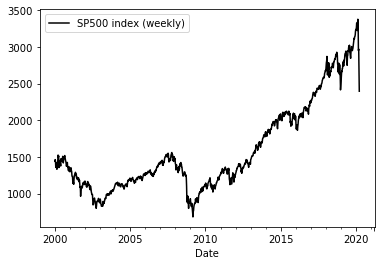

In [21]:
v_sp500_weekly['close'].plot(style='k', label='SP500 index (weekly)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

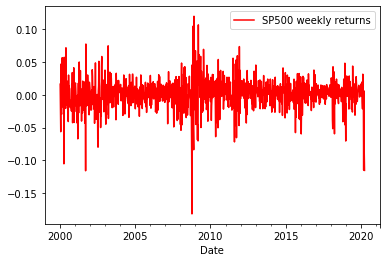

In [22]:
v_sp500_weekly['close'].pct_change().plot(style='r', label='SP500 weekly returns')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

In [23]:
v_sp500_weekly['close'].pct_change()

2000-01-07         NaN
2000-01-14    0.016428
2000-01-21   -0.016237
2000-01-28   -0.056336
2000-02-04    0.047208
2000-02-11   -0.026152
2000-02-18   -0.029579
2000-02-25   -0.009457
2000-03-03    0.056856
2000-03-10   -0.010006
2000-03-17    0.049747
2000-03-24    0.043012
2000-03-31   -0.018907
2000-04-07    0.011858
2000-04-14   -0.105378
2000-04-21    0.057484
2000-04-28    0.012471
2000-05-05   -0.013632
2000-05-12   -0.008146
2000-05-19   -0.009860
2000-05-26   -0.020562
2000-06-02    0.072016
2000-06-09   -0.013748
2000-06-16    0.005155
2000-06-23   -0.015692
2000-06-30    0.009102
2000-07-07    0.016706
2000-07-14    0.021016
2000-07-21   -0.019729
2000-07-28   -0.040738
                ...   
2019-08-30    0.027870
2019-09-06    0.017854
2019-09-13    0.009628
2019-09-20   -0.005094
2019-09-27   -0.010120
2019-10-04   -0.003302
2019-10-11    0.006186
2019-10-18    0.005363
2019-10-25    0.012173
2019-11-01    0.014676
2019-11-08    0.008533
2019-11-15    0.008852
2019-11-22 

### CBOE-VIX

In [24]:
v_vix_week_start_date = v_vix.resample('W-FRI').first()['Date']
v_vix_week_end_date = v_vix.resample('W-FRI').last()['Date']
v_vix_num_of_weeks = min(len(v_vix_week_start_date), len(v_vix_week_end_date))

v_vix_weekly_dict = {'date': [], 'open': [], 'high': [], 'low':[], 'close':[], 'volatility':[]}

for i in range(v_vix_num_of_weeks):
    v_vix_week = v_vix[v_vix_week_start_date[i]:v_vix_week_end_date[i]]
    if len(v_vix_week) > 0:
        v_vix_weekly_dict['date'].append(v_vix_week_end_date.index[i])
        v_vix_weekly_dict['open'].append(v_vix_week['Open'][0])
        v_vix_weekly_dict['close'].append(v_vix_week['Close'][-1])
        v_vix_weekly_dict['high'].append(v_vix_week['High'].max())
        v_vix_weekly_dict['low'].append(v_vix_week['Low'].min())
        if len(v_vix_week) == 1:
            v_vix_weekly_dict['volatility'].append(0.0)
        else:
            v_vix_weekly_dict['volatility'].append(np.std(v_vix_week['Close'].pct_change().dropna().values))    

v_vix_weekly = pd.DataFrame.from_dict(v_vix_weekly_dict)
v_vix_weekly.index = pd.to_datetime(v_vix_weekly['date'].values)
v_vix_weekly.drop(['date'], axis=1, inplace=True)
#v_vix_weekly = v_vix_weekly[:-1]
v_vix_weekly.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1055 entries, 2000-01-07 to 2020-03-20
Data columns (total 5 columns):
open          1055 non-null float64
high          1055 non-null float64
low           1055 non-null float64
close         1055 non-null float64
volatility    1055 non-null float64
dtypes: float64(5)
memory usage: 49.5 KB


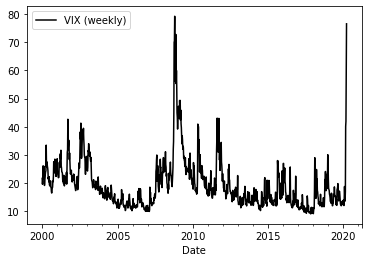

In [25]:
v_vix_weekly['close'].plot(style='k', label='VIX (weekly)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

In [26]:
v_vix_weekly['close']

2000-01-07    21.719999
2000-01-14    19.660000
2000-01-21    20.820000
2000-01-28    26.139999
2000-02-04    21.540001
2000-02-11    24.420000
2000-02-18    26.000000
2000-02-25    25.200001
2000-03-03    19.209999
2000-03-10    21.240000
2000-03-17    22.370001
2000-03-24    23.309999
2000-03-31    24.110001
2000-04-07    24.389999
2000-04-14    33.490002
2000-04-21    25.850000
2000-04-28    26.200001
2000-05-05    27.530001
2000-05-12    26.049999
2000-05-19    25.440001
2000-05-26    24.469999
2000-06-02    21.480000
2000-06-09    22.139999
2000-06-16    20.500000
2000-06-23    22.340000
2000-06-30    19.540001
2000-07-07    19.219999
2000-07-14    19.320000
2000-07-21    18.940001
2000-07-28    20.840000
                ...    
2019-08-30    18.980000
2019-09-06    15.000000
2019-09-13    13.740000
2019-09-20    15.320000
2019-09-27    17.219999
2019-10-04    17.040001
2019-10-11    15.580000
2019-10-18    14.250000
2019-10-25    12.650000
2019-11-01    12.300000
2019-11-08    12

### TO-DO: Completar para Outras Exchanges ... (apenas repetir o trecho de codigo)

## Uncertainty Indicator Data

- Exemplo de Amostragem Mensal

### US Equity Market Volatility Index

see __[US Equity Market Volatility Index
](http://www.policyuncertainty.com/EMV_monthly.html)__ for more details

This is a newspaper-based Equity Market Volatility (EMV) tracker that moves with the CBOE Volatility Index (VIX) 
and with the realized volatility of returns on the S&P500. 

There is also a Policy-Related EMV Tracker and a suite of more than 30 category-specific 
EMV trackers that quantify the importance of each category in the level of U.S. stock market volatility 
and its movements over time. The overall and category-specific EMV trackers 
are monthly and available from January 1985 to the present.

### - TO DO: necessário verificar a data em que o index mensal é reportado para sincronizar com as outras time series (semanais)


In [19]:
v_monthly_EMV_index =  pd.read_excel(v_directory + 'EMV_Data.xlsx') 
v_monthly_EMV_index = v_monthly_EMV_index[:-1]

v_monthly_EMV_index['Month'] = v_monthly_EMV_index['Month'].astype('str')
v_monthly_EMV_index['Year'] = v_monthly_EMV_index['Year'].astype('str')
s = pd.Series('', index=list(range(len(v_monthly_EMV_index))), dtype='str')
i = 0
for month in v_monthly_EMV_index['Month']:
    result =  month.split('.')
    if int(result[0]) <= 9:
        s[i] = result[1] + result[0]
    else:
        s[i] = result[0]
    i=i+1

v_monthly_EMV_index['Date'] = v_monthly_EMV_index['Year'] + '-' + s
v_monthly_EMV_index['Date'] = pd.to_datetime(v_monthly_EMV_index['Date'], format='%Y-%m')
v_monthly_EMV_index.index = v_monthly_EMV_index['Date'].values
v_monthly_EMV_index.sort_index(inplace=True)
v_monthly_EMV_index.drop(['Month', 'Year'], axis=1, inplace=True)
v_monthly_EMV_index.dropna(thresh=1, axis=0, inplace=True)

v_monthly_EMV_index.info()


ImportError: Install xlrd >= 0.9.0 for Excel support

In [ ]:
v_monthly_EMV_index['Overall EMV Tracker'].plot(style='k', label='EMV Tracker (monthly)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

